In [1]:
#!pip install opencv-python pytesseract

In [1]:
import cv2
import pytesseract
from pytesseract import Output
import os
import matplotlib.pyplot as plt

In [21]:
image_path = "text detection/Python.png"


In [22]:
import os

# List all files in the folder
folder_path = "text detection"
if os.path.exists(folder_path):
    print("Files in folder:", os.listdir(folder_path))
else:
    print(f"Folder '{folder_path}' does not exist.")


Files in folder: ['.ipynb_checkpoints', 'AA.jpg', 'Check.jpeg', 'Python.png', 'Summer.jpg']


In [23]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pytesseract
from pytesseract import Output
from PIL import Image


In [25]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


Image loaded successfully!


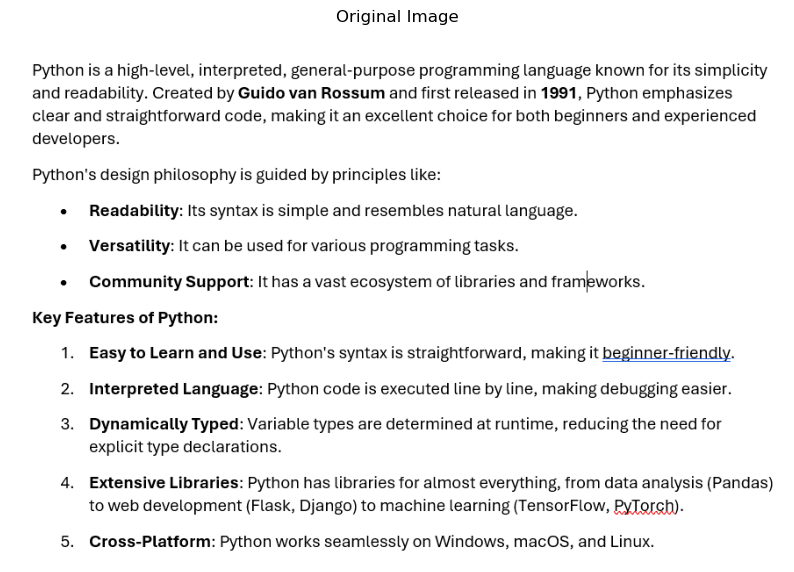

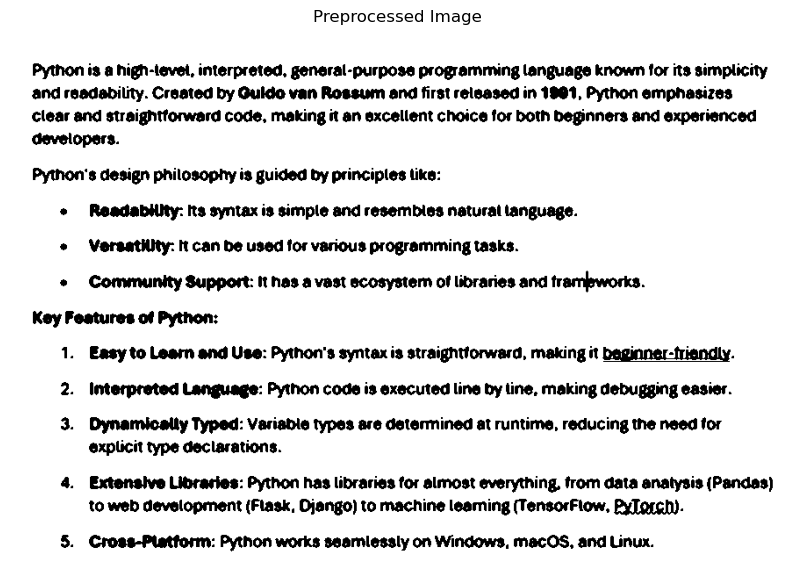

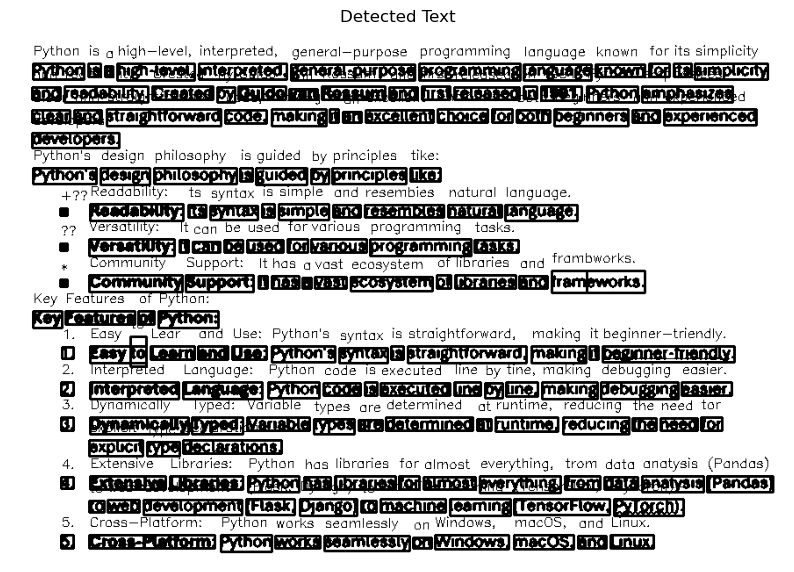

Results saved to detected_text_results.txt


In [26]:
# Import necessary libraries
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
import os

# Function to load the image
def load_image(image_path):
    """Load an image from the specified path."""
    if not os.path.exists(image_path):
        print(f"File '{image_path}' does not exist.")
        return None
    return cv2.imread(image_path)

# Function to preprocess the image
def preprocess_image(image):
    """Preprocess the image for better OCR results."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

# Function to perform text detection
def detect_text(image):
    """Detect and extract text from the image using Tesseract OCR."""
    # Convert the preprocessed image into text data
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    
    # Draw bounding boxes around detected text
    n_boxes = len(data['text'])
    for i in range(n_boxes):
        if data['text'][i].strip():
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, data['text'][i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    return image, data

# Function to save detected text results to a file
def save_results(data, output_path):
    """Save detected text data to a file."""
    with open(output_path, 'w') as file:
        for i, text in enumerate(data['text']):
            if text.strip():
                file.write(f"Text: {text}\n")
                file.write(f"Confidence: {data['conf'][i]}\n")
                file.write(f"Bounding Box: ({data['left'][i]}, {data['top'][i]}, {data['width'][i]}, {data['height'][i]})\n\n")
    print(f"Results saved to {output_path}")

# Function to display the image
def display_image(image, title="Image"):
    """Display the image using matplotlib."""
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Main Workflow
if __name__ == "__main__":
    # Specify the image path
    image_path = "text detection/Python.png"
    
    # Step 1: Load the image
    image = load_image(image_path)
    if image is None:
        print("Image loading failed. Please check the path.")
    else:
        print("Image loaded successfully!")
        display_image(image, title="Original Image")
    
        # Step 2: Preprocess the image
        preprocessed_image = preprocess_image(image)
        display_image(preprocessed_image, title="Preprocessed Image")
    
        # Step 3: Perform text detection
        detected_image, text_data = detect_text(preprocessed_image)
        display_image(detected_image, title="Detected Text")
    
        # Step 4: Save results to a text file
        output_path = "detected_text_results.txt"
        save_results(text_data, output_path)


In [27]:
image_path = "text detection/Python.png"

text = pytesseract.image_to_string(image_path,lang='eng')
print(text)

Python is a high-level, interpreted, general-purpose programming language known for its simplicity
and readability. Created by Guido van Rossum and first released in 1991, Python emphasizes
clear and straightforward code, making it an excellent choice for both beginners and experienced
developers.

Python's design philosophy is guided by principles like:
« Readability: Its syntax is simple and resembles natural language.
« Versatility: It can be used for various programming tasks.
« Community Support: It has a vast ecosystem of libraries and frameworks.
Key Features of Python:
1. Easy to Learn and Use: Python's syntax is straightforward, making it beginner-friendly.
2. Interpreted Language: Python code is executed line by line, making debugging easier.

3. Dynamically Typed: Variable types are determined at runtime, reducing the need for
explicit type declarations.

4. Extensive Libraries: Python has libraries for almost everything, from data analysis (Pandas)
to web development (Flask